In [1]:
using Graphs, GraphMakie, CairoMakie, Random

### Definición de Grafo Geométrico Aleatorio

Un **grafo geométrico aleatorio** es un tipo de grafo en el que los nodos están distribuidos aleatoriamente en el espacio y dos nodos están conectados si están lo suficientemente cerca, de acuerdo con una distancia definida. Este modelo de grafo es ampliamente utilizado en áreas como redes inalámbricas, donde la conectividad de los nodos depende de la proximidad espacial.

Formalmente, el proceso se define de la siguiente manera:

1. **Distribución de los Nodos**: Los nodos del grafo se colocan aleatoriamente en un espacio, típicamente en el plano Euclidiano $ \mathbb{R}^d $. Por ejemplo, en un espacio bidimensional (\( d = 2 \)), los nodos se distribuyen aleatoriamente en el plano.

2. **Conexión de los Nodos**: Dos nodos $ i $ y $ j $ están conectados si la distancia entre ellos es menor que un umbral $ r $, es decir, si $ \text{dist}(i, j) \leq r $, donde $ r $ es el radio de conexión.

3. **Parámetros Importantes**:
   - El **número de nodos** $ n $ en el grafo.
   - El **radio de conexión** $ r $, que controla la densidad del grafo.
   - La **distribución espacial** de los nodos, que generalmente es uniforme o sigue alguna distribución específica en el espacio.

### Encuentra el nodo más cercano al punto medio del área (0.5, 0.5)

Esta función tiene como objetivo encontrar el nodo más cercano al punto medio del área del plano, ubicado en las coordenadas (0.5, 0.5). La función recibe como entrada una matriz de puntos `puntos`, en la cual cada columna representa un punto en el espacio bidimensional. La función devuelve el índice del nodo más cercano al punto medio

In [2]:
function encontrarNodoCentro(puntos)
    distanciaActual = Inf
    nodoCentro = 0
    for (indice, punto) in enumerate(eachcol(puntos))
        # Calculando la distancia euclidiana entre nodos
        distancia = (punto[1] - 0.5)^2 + (punto[2] - 0.5)^2 
        if distancia < distanciaActual
            distanciaActual = distancia
            nodoCentro = indice
        end
    end
    nodoCentro
end

encontrarNodoCentro (generic function with 1 method)

### Función para Dibujar un Grafo Geométrico Aleatorio

Esta función tiene como propósito crear un grafo geométrico aleatorio a partir de un conjunto de puntos en un espacio 2D y visualizarlo. El grafo está formado por los puntos y sus conexiones basadas en la proximidad. Además, se destaca el nodo más cercano al centro del espacio, y se aplica un esquema de color y tamaño para los nodos basado en sus distancias y sus posiciones relativas al centro.

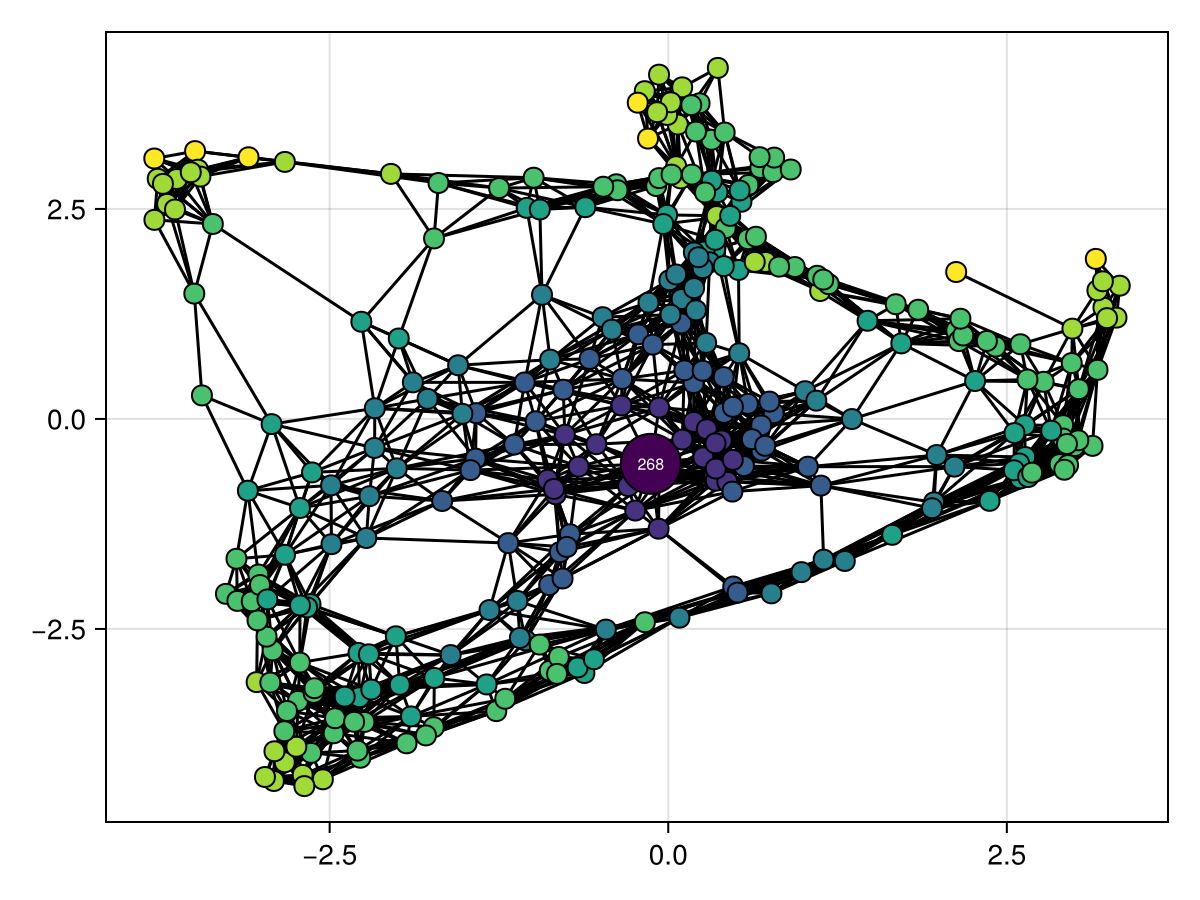

In [9]:
function dibujarGrafoGeometricoAleatorio(puntos::Matrix{Float32})
    grafo, = euclidean_graph(puntos; cutoff=0.125)  # Crear grafo geométrico

    nodoCentral = encontrarNodoCentro(puntos)  # Nodo más cercano al centro
    
    colorNodo = dijkstra_shortest_paths(grafo, nodoCentral).dists  # Colores basados en distancia

    # Tamaño de nodos
    tamañoNodo = fill(10, nv(grafo))
    tamañoNodo[nodoCentral] = 30
   
    # Etiquetas de nodos
    etiquetasNodos = 1:nv(grafo) 
    tamañoFuente = fill(0, nv(grafo))
    tamañoFuente[nodoCentral] = 8

    # Crear gráfico
    figura, ejes, p = graphplot(grafo;
        node_size=tamañoNodo,
        node_color=colorNodo,
        ilabels_fontsize=tamañoFuente,
        ilabels=etiquetasNodos,
        ilabels_color=:white,
    )

    save("GrafoGeometricoAleatorio.png", figura)
    figura  # Devolver figura
end


# Generar una matriz de 2x300 con números aleatorios entre 0 y 1, distribuidos uniformemente, y cada número tiene tipo Float32
puntos = rand(Xoshiro(2), Float32, (2, 300))   
# Dibuja el grafo
dibujarGrafoGeometricoAleatorio(puntos)               
